In [51]:
# データの用意
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt 

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape


In [52]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

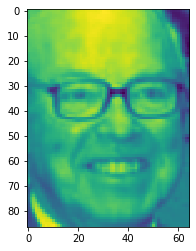

In [53]:
# people.image

plt.imshow(people.images[0])

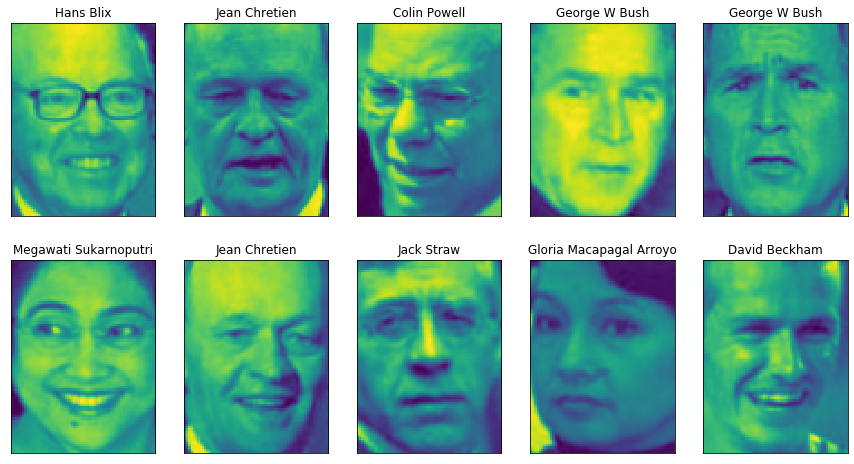

In [54]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [55]:
import numpy as np 

counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Ariel Sharon               77   Arnold Schwarzenegger      42   
Atal Bihari Vajpayee       24   Bill Clinton               29   Carlos Menem               21   
Colin Powell              236   David Beckham              31   Donald Rumsfeld           121   
George Robertson           22   George W Bush             530   Gerhard Schroeder         109   
Gloria Macapagal Arroyo    44   Gray Davis                 26   Hamid Karzai               22   
Hans Blix                  39   Hugo Chavez                71   Igor Ivanov                20   
Jack Straw                 28   Jacques Chirac             52   Jean Chretien              55   
Jennifer Aniston           21   Jennifer Capriati          42   Jennifer Lopez             21   
Jeremy Greenstock          24   Jiang Zemin                20   John Ashcroft              53   
John Negroponte            31 

In [56]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

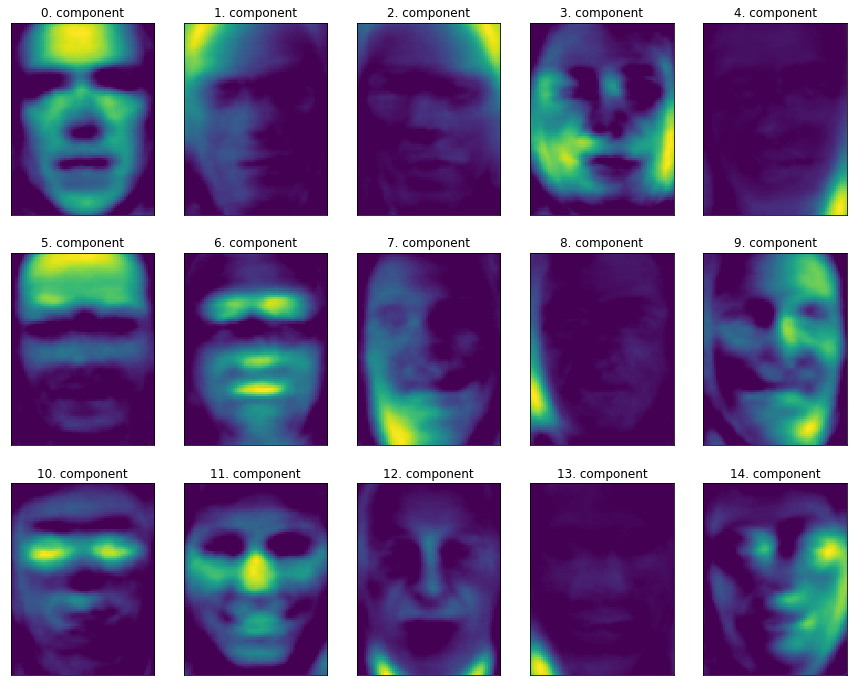

In [65]:
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
# X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. component'.format(i))

In [62]:
X_test.reshape(-1, 1).shape

(1356, 1)